In [1]:
import glob
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# import seaborn as sns
import palettable.colorbrewer.diverging as pld
import palettable as pt

import numpy as np
import pandas as pd

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [4]:
import palettable
palette2 = palettable.colorbrewer.diverging.RdYlGn_8_r
RdYlGn_8_r = palette2.mpl_colormap
palette2.mpl_colors

[(0.10196078431372549, 0.596078431372549, 0.3137254901960784),
 (0.4, 0.7411764705882353, 0.38823529411764707),
 (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 (0.8509803921568627, 0.9372549019607843, 0.5450980392156862),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.9921568627450981, 0.6823529411764706, 0.3803921568627451),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.8431372549019608, 0.18823529411764706, 0.15294117647058825)]

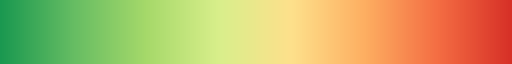

In [5]:
RdYlGn_8_r

In [6]:
palette2.hex_colors

['#1A9850',
 '#66BD63',
 '#A6D96A',
 '#D9EF8B',
 '#FEE08B',
 '#FDAE61',
 '#F46D43',
 '#D73027']

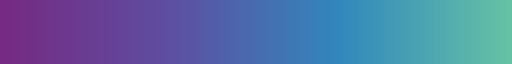

In [7]:
from matplotlib.colors import LinearSegmentedColormap
colors = [
    # (0.25098039215686274, 0.0, 0.29411764705882354), 
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
 # (0.6705882352941176, 0.8666666666666667, 0.6431372549019608),
 # (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 # (0.10196078431372549, 0.5882352941176471, 0.2549019607843137), 
         ]
BlGn = LinearSegmentedColormap.from_list('BlGn', colors, N=100)
BlGn

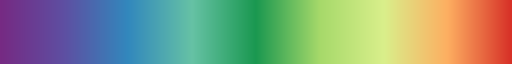

In [8]:
RdGnpu_mpl_colors: list = [
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
    
    (0.10196078431372549, 0.596078431372549, 0.3137254901960784), 
    
    # (0.4, 0.7411764705882353, 0.38823529411764707), 
    (0.6509803921568628, 0.8509803921568627, 0.41568627450980394), 
    (0.8509803921568627, 0.9372549019607843, 0.5450980392156862), 
    # (0.996078431372549, 0.8784313725490196, 0.5450980392156862), 
    (0.9921568627450981, 0.6823529411764706, 0.3803921568627451), 
    # (0.9568627450980393, 0.42745098039215684, 0.2627450980392157), 
    (0.8431372549019608, 0.18823529411764706, 0.15294117647058825), 
]
RdGnpu = LinearSegmentedColormap.from_list('RdGnpu', RdGnpu_mpl_colors, N=10000)
RdGnpu

In [9]:
from matplotlib.colors import rgb_to_hsv, to_hex
k = 9 #len(data_keys)
color_idx = np.linspace(0, 1, k)

# palette = pt.colorbrewer.sequential.GnBu_9
# cmap = RdGnpu.mpl_colormap
cmap = RdGnpu

i = 0
for kk in color_idx:
    hex_ = to_hex(cmap(kk))
    print(f'{i = }, {kk = }, {hex_ = }')
    i += 1

i = 0, kk = np.float64(0.0), hex_ = '#762a83'
i = 1, kk = np.float64(0.125), hex_ = '#5e4fa2'
i = 2, kk = np.float64(0.25), hex_ = '#3288bd'
i = 3, kk = np.float64(0.375), hex_ = '#66c2a5'
i = 4, kk = np.float64(0.5), hex_ = '#1a9850'
i = 5, kk = np.float64(0.625), hex_ = '#a6d96a'
i = 6, kk = np.float64(0.75), hex_ = '#d9ef8b'
i = 7, kk = np.float64(0.875), hex_ = '#fdae61'
i = 8, kk = np.float64(1.0), hex_ = '#d73027'


## Find path of G(r) and PL data

In [10]:
folder_base:str = '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/'
gr_identifier:str = os.path.join(folder_base, 'Halide Exchange Data', 'CsPb**.gr')
gr_path:list = glob.glob(gr_identifier)
gr_path.sort()
gr_basename:list = [os.path.basename(n) for n in gr_path]
print(*gr_basename, sep='\n')

CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.gr
CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.gr
CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.gr
CsPbBr2-Cl_8micl_10m_20220331-013211_a7121b_primary-1_mean_q.gr
CsPbBr2-I_16micl_10m_20220331-174358_03721b_primary-1_mean_q.gr
CsPbBr2-I_32micl_10m_20220331-170247_0063a7_primary-1_mean_q.gr
CsPbBr2-I_64micl_10m_20220331-162851_06d064_primary-1_mean_q.gr
CsPbBr2-I_8micl_10m_20220331-181657_70819d_primary-1_mean_q.gr
CsPbBr2_10m_20220330-230818_e61560_primary-1_mean_q.gr


In [11]:
PL_identifier:str = os.path.join(folder_base, '**.csv')
PL_path:list = glob.glob(PL_identifier)
PL_path.sort()
PL_basename:list = [os.path.basename(n) for n in PL_path]
print(*PL_basename, sep='\n')

20220330_CsPb_Cl_exchange.csv
20220630_CsPb_I_exchange.csv


## Organize data key and G(r) path as a data dictonary 

In [12]:
data_keys:list = ['Cl_64micl', 'Cl_32micl', 'Cl_16micl', 'Cl_8micl', 'CsPbBr2_10m', 'I_8micl', 'I_16micl', 'I_32micl', 'I_64micl']
data_dict:dict = {}
for key in data_keys:
    for _path in gr_path:
        basename = os.path.basename(_path)
        if key in basename:
            data_dict.update({key: _path})

data_dict

{'Cl_64micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.gr',
 'Cl_32micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.gr',
 'Cl_16micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.gr',
 'Cl_8micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed

In [13]:
def is_float(s):    
    """
    Checks if a string can be successfully converted to a float.
    
    Args:
    s: The string to check.
    
    Returns:
    True if the string can be converted to a float, False otherwise.
    """
    try:
        float(s)
        return True
    except ValueError:
        return False

def get_HeaderRows(fn, sep=' ', num_data_column=2, check_range=100, check_float=True):

    cont_01 = []
    with open(fn, 'r') as f:
        cont = f.readlines()
        f.close()
    
    for line in cont:
        new_line = line.strip('\n').split(sep)
        cont_01.append(new_line)

    i = 0
    while i < len(cont_01):
        c0 = (len(cont_01[i]) == num_data_column)
        c1 = all([len(l)==num_data_column for l in cont_01[i:i+check_range]])
        c2 = (is_float(cont_01[i][0]) and is_float(cont_01[i][1]))

        if check_float:
            if c0 and c1 and c2:
                # print(f'Num of rows of header is {i}.')
                break
        else:
            if c0 and c1:
                # print(f'Num of rows of header is {i}.')
                break
            
        i += 1

    return i

## Read G(r) and PL data into pandas

In [14]:
gr_df:pd.DataFrame = pd.DataFrame()
gr_df2:pd.DataFrame = pd.DataFrame()
for key, fn in data_dict.items():
    skiprows = get_HeaderRows(fn, sep=' ', num_data_column=2, check_range=100, check_float=True)
    df = pd.read_csv(fn, sep=' ', names=['r', 'gr'], skiprows=skiprows)
    gr_df[f'r_{key}'] = df['r']
    gr_df[f'gr_{key}'] = df['gr']
    gr_df2[f'gr_{key}'] = df['gr']

gr_df2

,gr_Cl_64micl,gr_Cl_32micl,gr_Cl_16micl,gr_Cl_8micl,gr_CsPbBr2_10m,gr_I_8micl,gr_I_16micl,gr_I_32micl,gr_I_64micl
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002540,0.001241,0.002726,-0.000795,0.007334,0.014485,0.008352,0.006401,0.004873
2,0.004941,0.002360,0.005331,-0.001593,0.014406,0.028479,0.016407,0.012578,0.009576
3,0.007074,0.003243,0.007703,-0.002395,0.020972,0.041519,0.023883,0.018319,0.013946
4,0.008823,0.003790,0.009738,-0.003203,0.026801,0.053170,0.030518,0.023428,0.017833
...,...,...,...,...,...,...,...,...,...
9996,0.008268,0.005462,0.004148,0.003926,0.001367,0.003817,0.000917,-0.001713,0.002545
9997,0.006158,0.003130,0.003501,0.003629,0.001348,0.003188,0.000055,-0.001865,0.002201
9998,0.003940,0.000751,0.002796,0.003284,0.001362,0.002522,-0.000804,-0.001957,0.001802
9999,0.001678,-0.001610,0.002050,0.002898,0.001409,0.001841,-0.001632,-0.001989,0.001356


In [15]:
data_keys[:4][::-1]

['Cl_8micl', 'Cl_16micl', 'Cl_32micl', 'Cl_64micl']

In [16]:
df_Cl = pd.read_csv(PL_path[0], sep=' ', names=['wavelength_nm']+data_keys[:4][::-1], skiprows=1)
df_I = pd.read_csv(PL_path[1], sep=' ', names=['wavelength_nm']+data_keys[4:], skiprows=1)

PL_df:pd.DataFrame = pd.concat([df_Cl, df_I], axis=1)

In [17]:
PL_df

,wavelength_nm,Cl_8micl,Cl_16micl,Cl_32micl,Cl_64micl,wavelength_nm,CsPbBr2_10m,I_8micl,I_16micl,I_32micl,I_64micl
0,196.263,-0.3315,-0.6500,-0.3385,-0.5795,196.263,-0.4484,0.2417,0.2640,-0.3244,0.4722
1,197.066,0.0115,-0.1120,-0.1695,-0.0295,197.066,-1.0177,-1.1290,-1.0607,1.6394,0.2115
2,197.870,0.8055,0.8760,0.9435,1.0465,197.870,1.3646,0.6981,0.5527,-0.9144,0.4842
3,198.673,-0.7320,-0.7565,-0.9590,-0.8290,198.673,-0.9573,-0.6657,-0.8873,-0.5451,1.0464
4,199.476,7.7175,16.5620,8.5980,3.9025,199.476,4.2529,-0.2159,0.0467,1.5225,1.0434
...,...,...,...,...,...,...,...,...,...,...,...
1039,989.419,1.9685,2.2435,1.3225,1.2580,989.419,6.4010,-1.8086,-1.7745,-0.3956,-0.7738
1040,990.139,0.4865,0.3565,0.3545,0.3590,990.139,-0.6065,-1.0544,-1.1065,-0.4716,-0.7295
1041,990.860,-0.6825,-0.5300,-0.7265,-0.2975,990.860,-0.6631,0.1572,0.0526,-1.0784,0.2996
1042,991.581,0.7940,0.9760,0.8930,0.6840,991.581,-0.2444,0.5051,0.3697,-0.1294,0.4257


## Plot data

In [18]:
gr_df[f'gr_{data_keys[0]}']

0        0.000000
1        0.002540
2        0.004941
3        0.007074
4        0.008823
           ...   
9996     0.008268
9997     0.006158
9998     0.003940
9999     0.001678
10000   -0.000566
Name: gr_Cl_64micl, Length: 10001, dtype: float64

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8


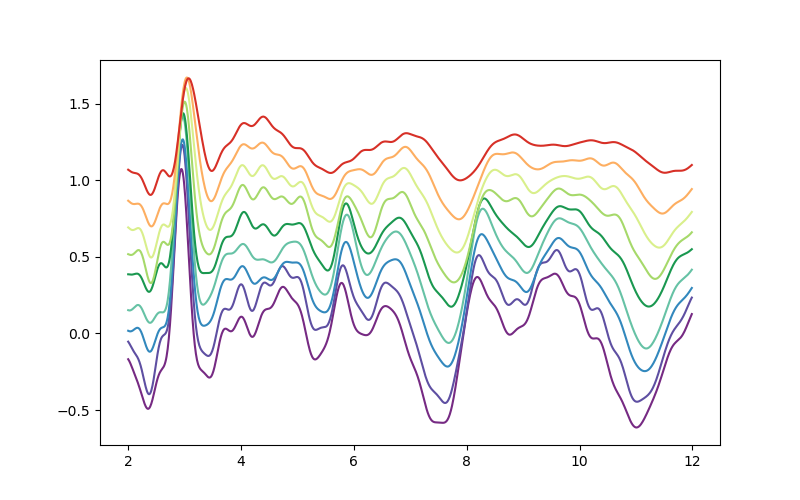

In [19]:
f0 = plt.figure(figsize=(8, 5))
ax0 = f0.add_subplot(1,1,1)

k = len(data_keys)
color_idx = np.linspace(0, 1, k)

# palette = pt.colorbrewer.diverging.Spectral_11_r
# cmap = palette.mpl_colormap
cmap = RdGnpu

y_offset = 0.15
x_min = 200
x_max = 1200

for i in range(0, k, 1):
# for i in [0, 4, 8]:
    print(f'{i = }')
    ax0.plot(gr_df[f'r_{data_keys[i]}'].iloc[x_min:x_max], gr_df[f'gr_{data_keys[i]}'].iloc[x_min:x_max]+y_offset*i, label=f'{data_keys[i]}', color=cmap(color_idx[i]))

In [20]:
gr_df2.shape

(10001, 9)

In [21]:
plt.close('all')

In [22]:
data_keys

['Cl_64micl',
 'Cl_32micl',
 'Cl_16micl',
 'Cl_8micl',
 'CsPbBr2_10m',
 'I_8micl',
 'I_16micl',
 'I_32micl',
 'I_64micl']

In [23]:
PL_df.shape

(1044, 11)

In [24]:
PL_df.keys()

Index(['wavelength_nm', 'Cl_8micl', 'Cl_16micl', 'Cl_32micl', 'Cl_64micl',
       'wavelength_nm', 'CsPbBr2_10m', 'I_8micl', 'I_16micl', 'I_32micl',
       'I_64micl'],
      dtype='object')

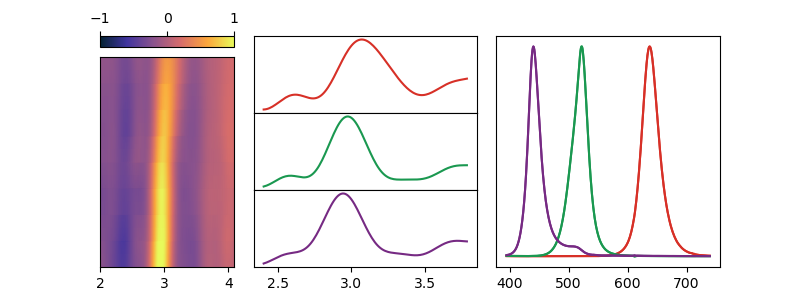

In [27]:
x_min = 200
x_max = 410
x = gr_df['r_Cl_64micl'].to_numpy()[x_min:x_max]
y = np.linspace(1, 9, 9)
X, Y = np.meshgrid(x, y)
Z = gr_df2.iloc[x_min:x_max].to_numpy().T

# norm = mpl.colors.Normalize(vmin=np.percentile(Z, 0), vmax=np.percentile(Z, 100))
norm = mpl.colors.Normalize(vmin=-1.0, vmax=1.0, clip=True)

palette = pt.cmocean.sequential.Thermal_6
# palette = pt.colorbrewer.diverging.Spectral_11
# palette = pt.colorbrewer.sequential.YlGnBu_9
# palette = pt.lightbartlein.diverging.BlueOrange10_10
cmap = palette.mpl_colormap

# Create the pcolormesh plot
gs = GridSpec(nrows=3, ncols=3, width_ratios=[.3, .5, .5])
f1 = plt.figure(figsize=(8, 3))
ax1 = f1.add_subplot(gs[:,0])
mesh = ax1.pcolormesh(X, Y, Z, cmap=cmap, shading='gouraud', norm=norm)

ax1.set_yticks([])

# Add a colorbar
ax_divider1 = make_axes_locatable(ax1)
cax1 = ax_divider1.append_axes("top", size="5%", pad="5%")
cbar1 = f1.colorbar(mesh, cax=cax1, location='top')
# cbar1.set_ticks([])
# f1.colorbar(mesh, ax=ax, label='Z value')

# ax.set_title('pcolormesh Example')
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')

## Plot G(r)
# palette = pt.colorbrewer.diverging.Spectral_9_r
# cmap = palette.mpl_colormap
cmap = RdGnpu
k = len(data_keys)
color_idx = np.linspace(0, 1, k)
c_list = [cmap(color_idx[8]), cmap(color_idx[4]), cmap(color_idx[0])]
x0 = 240
x1 = 380
y_offset = 0
j = 0
for i in [8, 4, 0]:
    ax1 = f1.add_subplot(gs[j,1])
    ax1.plot(gr_df[f'r_{data_keys[i]}'].iloc[x0:x1], gr_df[f'gr_{data_keys[i]}'].iloc[x0:x1]+y_offset*i, label=f'{data_keys[i]}', color=c_list[j])
    
    ax1.set_yticks([])
    if i != 0:
        ax1.set_xticks([])
    
    j += 1



## Plot PL
palette = pt.colorbrewer.diverging.Spectral_9_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('jet')
# c_list = ['r', 'g', 'b']
x0 = 250
x1 = 700
y_offset = 0
j = 0
ax1 = f1.add_subplot(gs[:,2])
for i in [8, 4, 0]:
    normalied_PL = PL_df[f'{data_keys[i]}'].iloc[x0:x1] / PL_df[f'{data_keys[i]}'].max()
    ax1.plot(PL_df['wavelength_nm'].iloc[x0:x1], normalied_PL+y_offset*i, label=f'{data_keys[i]}', color=c_list[j])
    
    ax1.set_yticks([])
    # if i != 0:
    #     ax1.set_xticks([])
    
    j += 1


f1.subplots_adjust(hspace=0)
f1.subplots_adjust(wspace=0.1)
# f1.tight_layout()